In [2]:
!pip install missingno

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Optional
import plotly.express as px
import missingno as msno


In [4]:
df = pd.read_csv("Emission_Agriculture.csv")

In [5]:
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,GN,Emissions from Energy use in agriculture,4,Afghanistan,72184,Energy use in agriculture,6807,Electricity,1990,1990,TJ,115.2,E,Estimated value
1,GN,Emissions from Energy use in agriculture,4,Afghanistan,72184,Energy use in agriculture,6807,Electricity,1991,1991,TJ,100.8,E,Estimated value
2,GN,Emissions from Energy use in agriculture,4,Afghanistan,72184,Energy use in agriculture,6807,Electricity,1992,1992,TJ,79.2,E,Estimated value
3,GN,Emissions from Energy use in agriculture,4,Afghanistan,72184,Energy use in agriculture,6807,Electricity,1993,1993,TJ,75.6,E,Estimated value
4,GN,Emissions from Energy use in agriculture,4,Afghanistan,72184,Energy use in agriculture,6807,Electricity,1994,1994,TJ,72.0,E,Estimated value


In [7]:
print(df.head())

  Domain Code                                    Domain  Area Code (M49)  \
0          GN  Emissions from Energy use in agriculture                4   
1          GN  Emissions from Energy use in agriculture                4   
2          GN  Emissions from Energy use in agriculture                4   
3          GN  Emissions from Energy use in agriculture                4   
4          GN  Emissions from Energy use in agriculture                4   

          Area  Element Code                    Element  Item Code  \
0  Afghanistan         72184  Energy use in agriculture       6807   
1  Afghanistan         72184  Energy use in agriculture       6807   
2  Afghanistan         72184  Energy use in agriculture       6807   
3  Afghanistan         72184  Energy use in agriculture       6807   
4  Afghanistan         72184  Energy use in agriculture       6807   

          Item  Year Code  Year Unit  Value Flag Flag Description  
0  Electricity       1990  1990   TJ  115.2    E  Esti

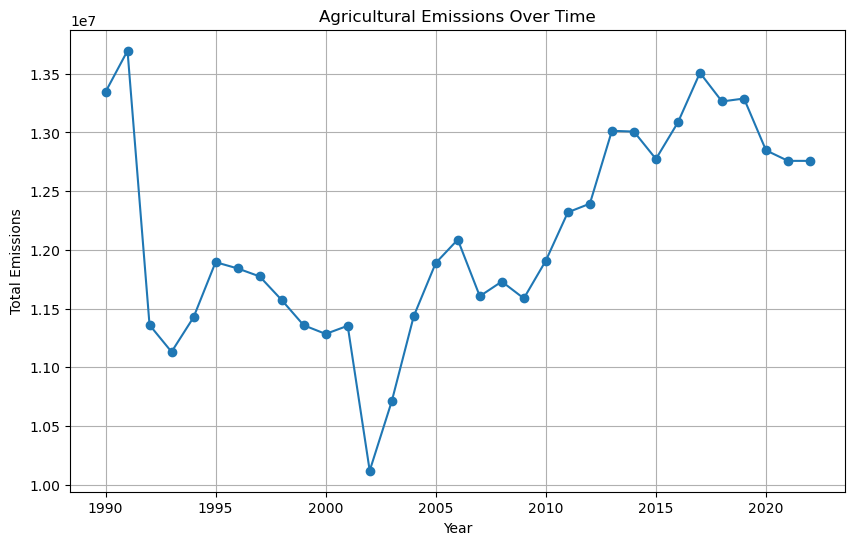

In [10]:
# Group by year
yearly_emissions = df.groupby('Year')['Value'].sum().reset_index()

# Plot
plt.figure(figsize=(10,6))
plt.plot(yearly_emissions['Year'], yearly_emissions['Value'], marker='o')
plt.title("Agricultural Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("Total Emissions")
plt.grid(True)
plt.show()

C:\Users\SOOQ ELASER\AppData\Local\Temp\ipykernel_9000\3096312441.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_emitters.values, y=top_emitters.index, hue=None, palette="viridis", legend=False)


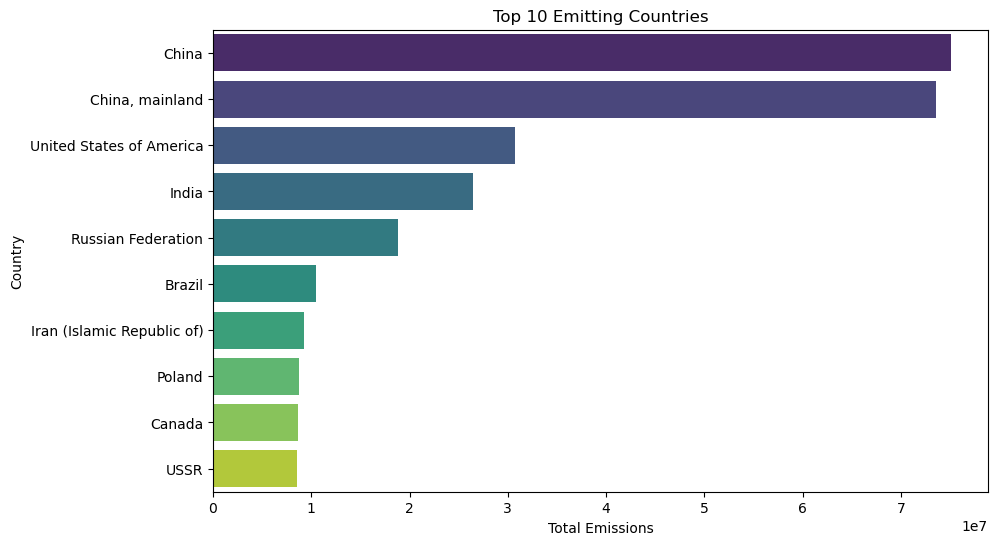

In [14]:
top_emitters = df.groupby('Area')['Value'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_emitters.values, y=top_emitters.index, hue=None, palette="viridis", legend=False)
plt.title("Top 10 Emitting Countries")
plt.xlabel("Total Emissions")
plt.ylabel("Country")
plt.show()

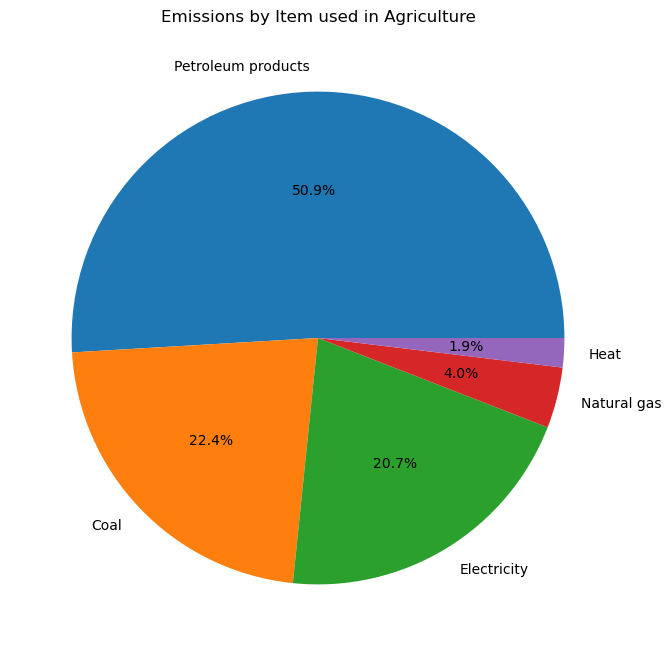

In [17]:
crop_emissions = df.groupby('Item')['Value'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,8))
crop_emissions.plot(kind='pie', autopct='%1.1f%%')
plt.title("Emissions by Item used in Agriculture")
plt.ylabel('')
plt.show()

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: 'GN'

<Figure size 1000x600 with 0 Axes>

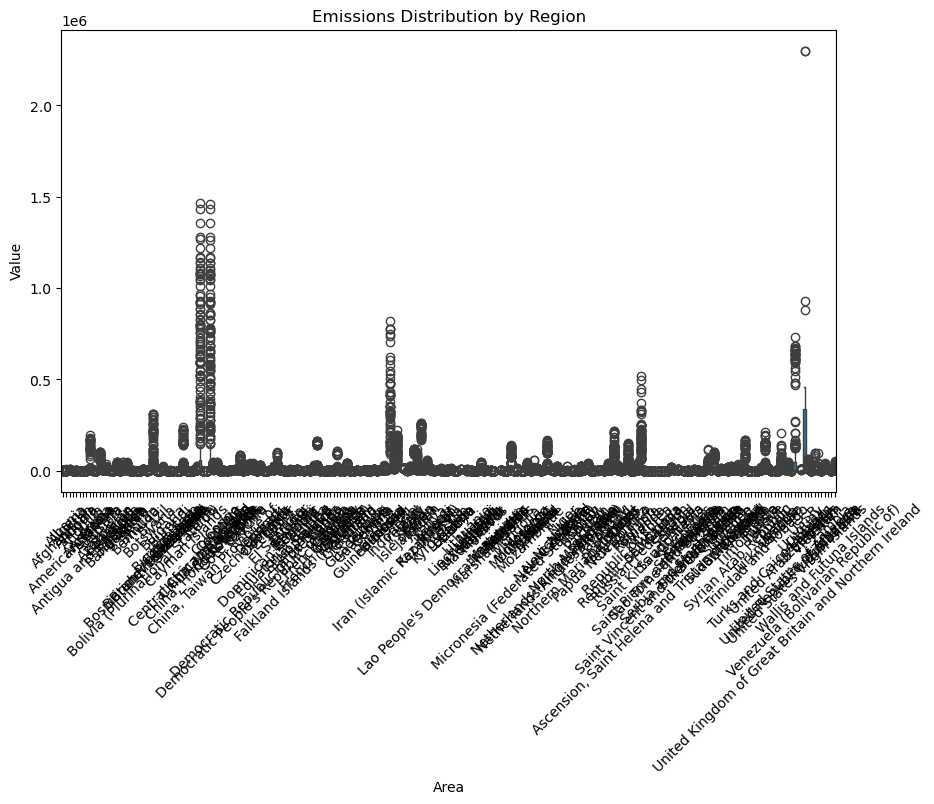

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Area', y='Value')
plt.xticks(rotation=45)
plt.title("Emissions Distribution by Region")
plt.show()